In [1]:
autosave 0

Autosave disabled


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000
...,...,...,...,...,...,...
2082,2082,CRI,PISASCIENCE,BOY,2018,420.000
2083,2083,CRI,PISASCIENCE,GIRL,2018,411.000
2084,2084,LTU,PISASCIENCE,TOT,2018,482.000
2085,2085,LTU,PISASCIENCE,BOY,2018,479.000


In [5]:
df = df.drop(["index"], axis=1)

In [6]:
df = df.astype({"TIME":"Int16"}).rename(columns={'TIME':'Year'})

In [7]:
df = df.drop(df[df['SUBJECT'] == "TOT"].index)

In [8]:
df.rename(columns=lambda x: x.capitalize(), inplace=True) 

In [9]:
df

,Location,Indicator,Subject,Year,Value
0,AUS,PISAMATH,BOY,2003,527.000
1,AUS,PISAMATH,BOY,2006,527.000
2,AUS,PISAMATH,BOY,2009,519.000
3,AUS,PISAMATH,BOY,2012,510.115
4,AUS,PISAMATH,BOY,2015,497.000
...,...,...,...,...,...
2080,MAC,PISASCIENCE,GIRL,2015,532.000
2082,CRI,PISASCIENCE,BOY,2018,420.000
2083,CRI,PISASCIENCE,GIRL,2018,411.000
2085,LTU,PISASCIENCE,BOY,2018,479.000


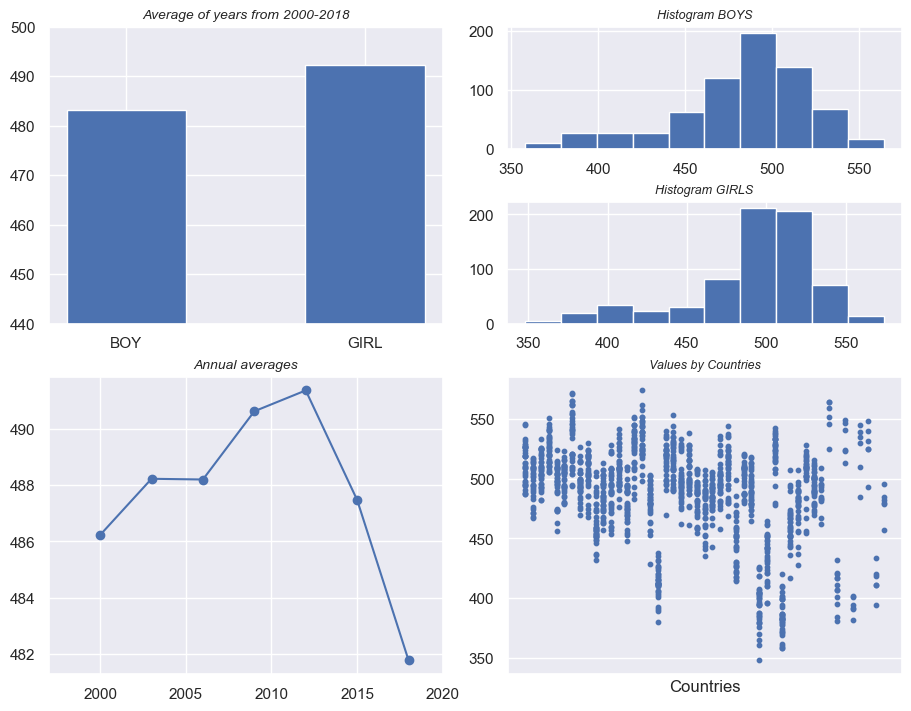

In [10]:
sns.set (rc = {'figure.figsize':(9, 7)})
sns.set_style('darkgrid')

hist = [["hist BOY"], ["hist GIRL"]]
outer_nested_mosaic = [["bar", hist], ["plot", "scatter"]]
axd = plt.figure(layout="constrained").subplot_mosaic(outer_nested_mosaic, empty_sentinel=None)

axd["bar"].set_ylim([440, 500])
axd["bar"].bar(x=df.groupby(["Subject"])[["Value"]].mean().index,
               height=df.groupby(["Subject"])[["Value"]].mean()["Value"], width=0.5)
axd["bar"].set_title('Average of years from 2000-2018', fontsize=10, style='italic')

axd["plot"].plot(df.groupby(["Year"])[["Value"]].mean(), marker='o')
axd["plot"].set_xlim([1997, 2020])
axd["plot"].set_title('Annual averages', fontsize=10, style='italic')

axd["hist BOY"].hist(df.loc[df["Subject"] == "BOY", "Value"])
axd["hist BOY"].set_title('Histogram BOYS', fontsize=9, style='italic')
axd["hist GIRL"].hist(df.loc[df["Subject"] == "GIRL", "Value"])
axd["hist GIRL"].set_title('Histogram GIRLS', fontsize=9, style='italic')

axd["scatter"].scatter(df["Location"], df["Value"], s=10)
axd["scatter"].set_xticks([])
axd["scatter"].set_xlabel('Countries')
axd["scatter"].set_title('Values by Countries', fontsize=9, style='italic')
plt.savefig('chart9.pdf', format='pdf', dpi=300)
plt.show()